In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

# Data Cleaning

Seperate the csv file formating with a semi colunm

In [3]:
wwine = pd.read_csv("./data/winequality-white.csv", sep=';')
wwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Check to missing values

In [4]:
wwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Get information and desrciption of our dataset

In [5]:
wwine.info()
wwine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


From our datasets, we have no categorical colunms which allows us to use a regression to try and predict the wine quality based on each features stated above.
We start by Checking the correlation of each wine feature to the qaulity

In [6]:
# drop quality and check correlations
correlations = wwine.corr()['quality'].drop('quality')
correlations

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

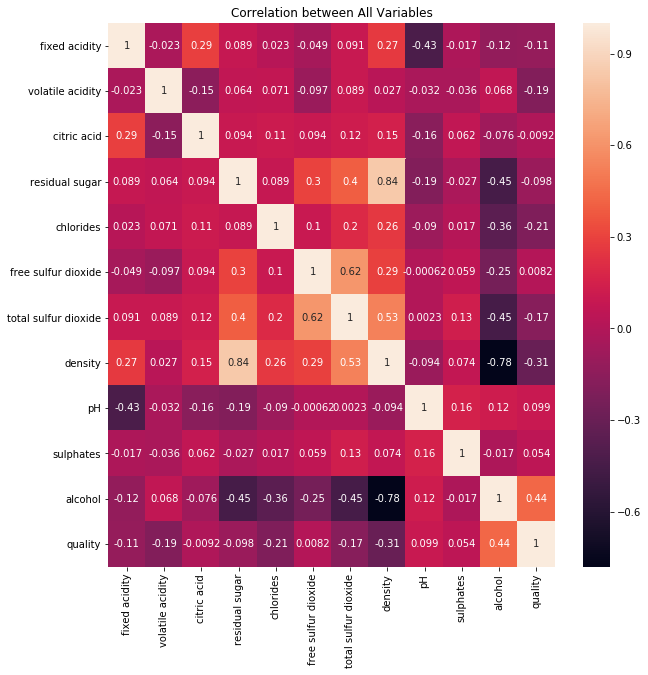

In [7]:
# sns.heatmap(wwine.corr())
corr = wwine.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between All Variables')
plt.show()

We can see from the above matrix, qaulity with (citric acid, and free sulfur dioxide) are not correlated so we can drop them if needs be.

In [8]:
final = wwine.drop(['citric acid', 'free sulfur dioxide','quality'], axis = 1) 
final.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,0.045,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,0.049,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,0.050,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,8.5,0.058,186.0,0.9956,3.19,0.40,9.9


Features with correlation as input x and quality as target variable y.

In [9]:
x = final
y = wwine.quality

Lets split our data into test and train sets using sklearn train_test_split function. We randomise the data to allow non-linear selection.

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

Lets check the split 

In [11]:
x_train.shape, x_test.shape, wwine.shape

((3673, 9), (1225, 9), (4898, 12))

25 percent of the wwine data is used for testing, and 75percent for training 

# Model Cross Validation

Lets normalise/standardize our features before applying the machine learning techniques

In [12]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Lets do a cross validation using (kfold) to check which algortihm works best for our standadised train and test data, we will import (Decision Tree Algorithm, Random Forest, GradientBoosting, and Support Vector Regression (SVR) from sklearn. We will validate the models using Mean Absolute Error, we can also use Mean Sqaured Error

In [19]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

create a list of models and loop through them to evaluate our data with all the models in the list

In [20]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor(n_estimators=10)))
models.append(('GradienBoost', GradientBoostingRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('SVR', SVR(gamma='scale')))
names = []

In [21]:

for name,model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    results = model_selection.cross_val_score(model,x_train_scaled,y_train, cv= kfold, scoring = 'neg_mean_absolute_error')
    names.append(name)
    msg  = "%s: %f" % (name, -1*(results).mean())
    print(msg)

LinearRegression: 0.588074
DecisionTree: 0.538247
RandomForest: 0.491498
GradienBoost: 0.552705
Ridge: 0.588052
Lasso: 0.675866
SVR: 0.530677


The less the Mean Absolute Error, the better the model for our data. From the above models, RandomForest Tree is the best choice

# Random Forest Model

We start with a model with n_estimators=10, fit it to our scalled x_train and y_train data, and pred scalled_x_test

In [22]:
model = RandomForestRegressor(n_estimators=10)
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

We follow that up with a mean absolute error calcualtion of our prediciton against out test data.

In [23]:
mean_absolute_error(y_pred,y_test)

0.4817142857142857

In [24]:
svr_rmse = (np.sqrt(mean_absolute_error(y_pred,y_test))) #RMSE
svr_r2 = r2_score(y_pred,y_test) #R2
svr_rmse,svr_r2 

(0.6940563995197261, -0.11849813319390545)

# Model Tuning

The goal is to get a lower mean absolute error, we can try to achieve this by tunning the n_estimator value using different leaf nodes from 1, 50 and plot the result on a scale to see which one gives best perfomance

Lets create a function to accept, (1:50, train_data, test_data, target_train, target_test) 

In [25]:
def get_mae(n_estimator, training_data, test_data, target_training, target_test):
    
    #fitting model with new estimator and training sets
    # fitting model with different input nodes
    model = RandomForestRegressor(n_estimators=n_estimator, random_state=0)
    # fitting the model with the training datasets
    model.fit(training_data, target_training)

    #prediction with new estiamted model
    # making prediction with the test dataset
    prediction_val = model.predict(test_data)

    # return results for MAE for the new estimator turning
    mae = mean_absolute_error(target_test, prediction_val)
    return(mae)

Lets create a list of n_estimator turning the leaf nodes from 1 - 50 and plot the result of the Mean Absolute Errors. We could also tune the max_features and criterion of the model. This woul help us avoid overfitting by choosing the right n_estimator

In [26]:
mae_plot = {}
for estimator in range(1,50):
    mae = get_mae(estimator,x_train_scaled,x_test_scaled,y_train,y_test)
    mae_plot[estimator] = mae

mae_plot

{1: 0.5616326530612245,
 2: 0.5118367346938776,
 3: 0.5170068027210883,
 4: 0.5093877551020408,
 5: 0.49322448979591843,
 6: 0.4910204081632653,
 7: 0.4823323615160351,
 8: 0.48214285714285715,
 9: 0.4807256235827664,
 10: 0.48130612244897963,
 11: 0.47725417439703155,
 12: 0.476734693877551,
 13: 0.4792464678178964,
 14: 0.4765014577259475,
 15: 0.47531972789115645,
 16: 0.4738775510204082,
 17: 0.4737575030012004,
 18: 0.4736961451247166,
 19: 0.4725241675617616,
 20: 0.47216326530612235,
 21: 0.47218658892128273,
 22: 0.4704638218923934,
 23: 0.46988464951197867,
 24: 0.4691496598639455,
 25: 0.4680816326530612,
 26: 0.4664678178963893,
 27: 0.4660317460317461,
 28: 0.46533527696793,
 29: 0.4651090781140042,
 30: 0.4642176870748299,
 31: 0.4640684660961158,
 32: 0.46448979591836737,
 33: 0.4641682127396412,
 34: 0.4648979591836734,
 35: 0.465002915451895,
 36: 0.46383219954648525,
 37: 0.4641147269718699,
 38: 0.464296455424275,
 39: 0.4642595499738357,
 40: 0.4635714285714286,
 41:

Lets plot the result of mae_plot with the tuned nodes

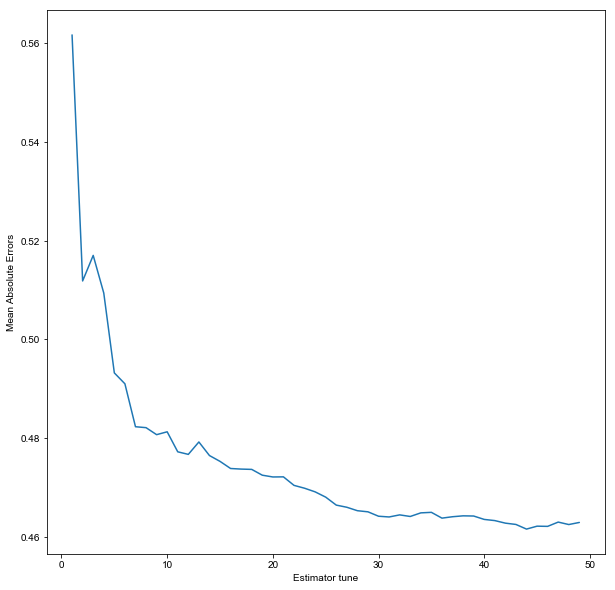

In [27]:
# convert to pandas dataframe
estimator_axis = list(mae_plot.keys())
mae_axis = list(mae_plot.values())

d = {'mae': mae_axis, 'estimator_tune': estimator_axis}
plot_data = pd.DataFrame(d)

# plot with seaborn
fig, ax = plt.subplots(figsize = (10,10))
sns.set_style("darkgrid")
sns.lineplot(y='mae', x='estimator_tune', data=plot_data)
ax.set(xlabel='Estimator tune', ylabel='Mean Absolute Errors')
plt.show()

We can see from our plot that 44 is the best possible estimator num to get the best result from our model. Lets train our model with the new best estimator of 44 and check the Mean Absolute Error if its changed from 0.48244897959183664.

In [38]:
model = RandomForestRegressor(n_estimators=44)
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
mean_absolute_error(y_pred,y_test)

0.46554730983302406

We see a slight reduction of 0.02 in the Mean Absolute Error, let try with another value 30

A slight reduction after the tuning in MAE = 0.4634557823129251

# Ground Truth Check

# Random Forest Model

In [28]:
model = RandomForestRegressor(n_estimators=30)
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
mean_absolute_error(y_pred,y_test)

0.46707482993197275

Ground truth check of alcohol (that has the highest correlation with quality as seen above) vs predicted test data 

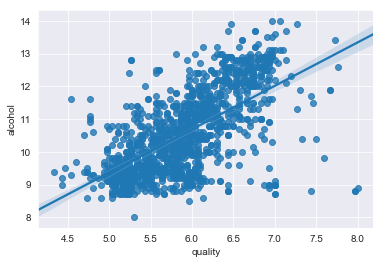

In [30]:

y_axis = list(y_pred)
x_axis = list(x_test['alcohol'])

d = {'quality': y_axis, 'alcohol': x_axis}
plot_data = pd.DataFrame(d)

sns.regplot(x="quality", y="alcohol", data=plot_data);

# SVR

In [31]:
model = SVR(gamma=0.3)
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
mean_absolute_error(y_pred,y_test)

0.5278684995216489

Ground truth check of alcohol (that has the highest correlation with quality as seen above) vs predicted test data 

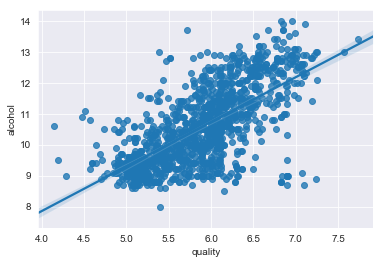

In [32]:


y_axis = list(y_pred)
x_axis = list(x_test['alcohol'])

d = {'quality': y_axis, 'alcohol': x_axis}
plot_data = pd.DataFrame(d)

sns.regplot(x="quality", y="alcohol", data=plot_data);


# DecisionTreeRegressor

In [33]:
model = DecisionTreeRegressor()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
mean_absolute_error(y_pred,y_test)

0.5583673469387755

Ground truth check of alcohol (that has the highest correlation with quality as seen above) vs predicted test data 

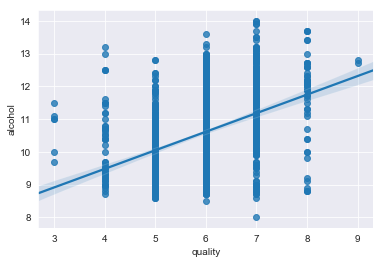

In [34]:


y_axis = list(y_pred)
x_axis = list(x_test['alcohol'])

d = {'quality': y_axis, 'alcohol': x_axis}
plot_data = pd.DataFrame(d)

sns.regplot(x="quality", y="alcohol", data=plot_data);


# GradientBoostingRegressor

In [35]:
model = GradientBoostingRegressor()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
mean_absolute_error(y_pred,y_test)

0.5537447709594405

Ground truth check of alcohol (that has the highest correlation with quality as seen above) vs predicted test data 

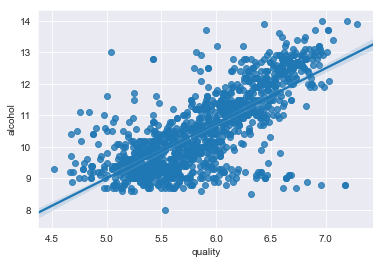

In [36]:


y_axis = list(y_pred)
x_axis = list(x_test['alcohol'])

d = {'quality': y_axis, 'alcohol': x_axis}
plot_data = pd.DataFrame(d)

sns.regplot(x="quality", y="alcohol", data=plot_data);
